In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('../Movies Prediction/IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [8]:
df['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [9]:
df.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True) 
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [11]:
df['Year'] = df['Year'].str.strip('()').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.3+ KB


In [13]:
df.drop('Genre',axis=1,inplace=True)
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


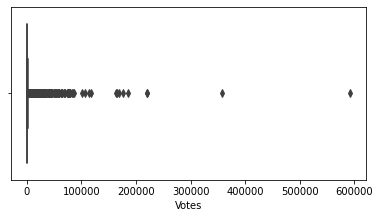

In [14]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sb.boxplot(x='Votes',data=df)
plt.show()

c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


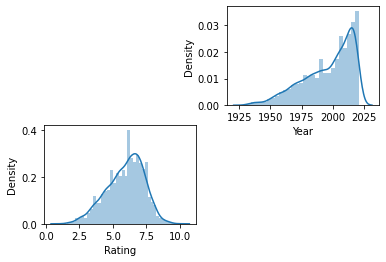

In [15]:
plt.subplot(2,2,2)
sb.distplot(df['Year'])
plt.subplot(2,2,3)
sb.distplot(df['Rating'])
plt.show()

In [20]:
plt.figure(figsize=(100, 60))

<Figure size 7200x4320 with 0 Axes>

<Figure size 7200x4320 with 0 Axes>

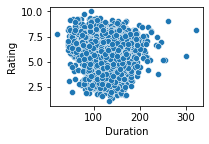

In [21]:
plt.subplot(2,2,4)
sb.scatterplot(x=df['Duration'], y=df['Rating'], data=df)
plt.show()

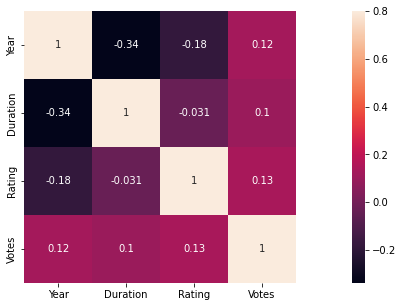

In [22]:
corrmat = df.corr()
fig = plt.figure(figsize = (20, 5))
sb.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [23]:
X = df[['Year','Duration','Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=27)

In [24]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [26]:
y_pred_pipeline = pipeline.predict(X_test)

In [27]:
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
r2_pipeline = r2_score(y_test, y_pred_pipeline)
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-squared:", r2_pipeline)

Pipeline Mean Absolute Error: 1.0938259828219308
Pipeline Mean Squared Error: 1.9170281363525021
Pipeline R-squared: 0.029325661546001802


In [29]:
new_input = pd.DataFrame({
    'Year': [2023],         
    'Duration': [156],       
    'Votes': [15876], 
})
print("Predicted Rating:", pipeline.predict(new_input))

Predicted Rating: [5.48025424]
